<a href="https://colab.research.google.com/github/AleksandraBelousova/Optimisation-and-Estimation-of-the-Random-Forest-Model/blob/main/Optimisation_and_Estimation_of_the_Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1tbuzaotDKhHN9MWHEmS8wWysqKX8xKJq -O Data_Cortex_Nuclear.csv

Downloading...
From: https://drive.google.com/uc?id=1tbuzaotDKhHN9MWHEmS8wWysqKX8xKJq
To: /content/Data_Cortex_Nuclear.csv
100% 1.01M/1.01M [00:00<00:00, 26.5MB/s]


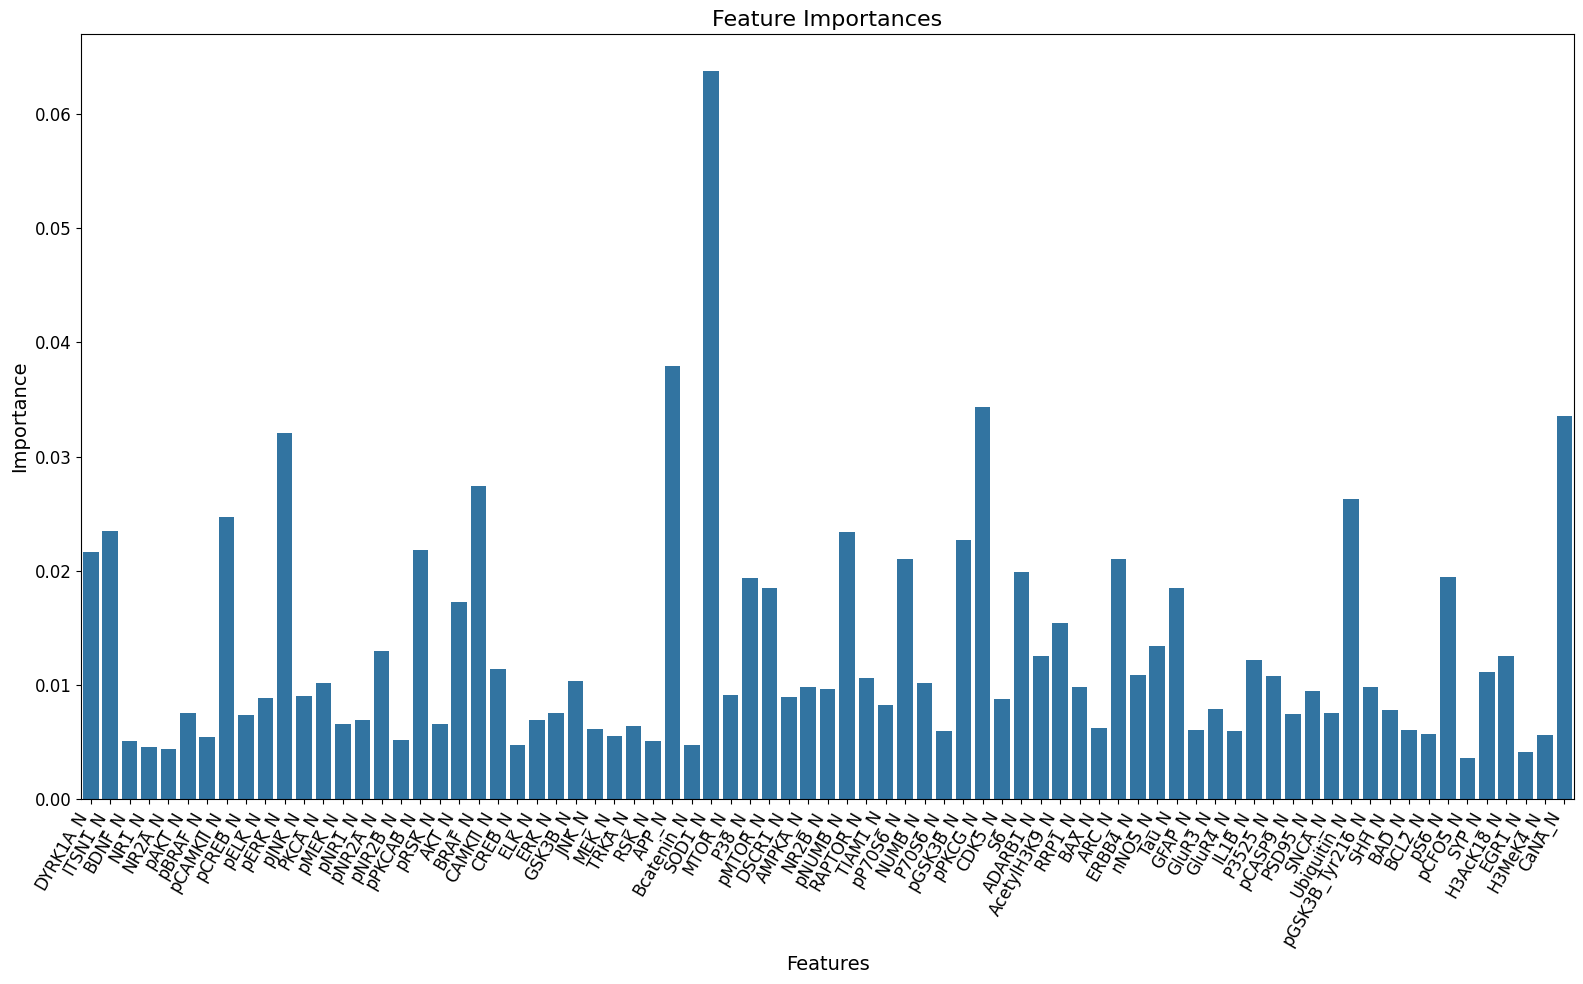

In [ ]:
import pandas as pd
import numpy as np  # Импортируйте NumPy здесь
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data_Cortex_Nuclear.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
features = df.loc[:, numeric_cols]
target = df['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)

importances = model.feature_importances_
plt.figure(figsize=(16, 10))
sns.barplot(x=numeric_cols, y=importances)
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
})

plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

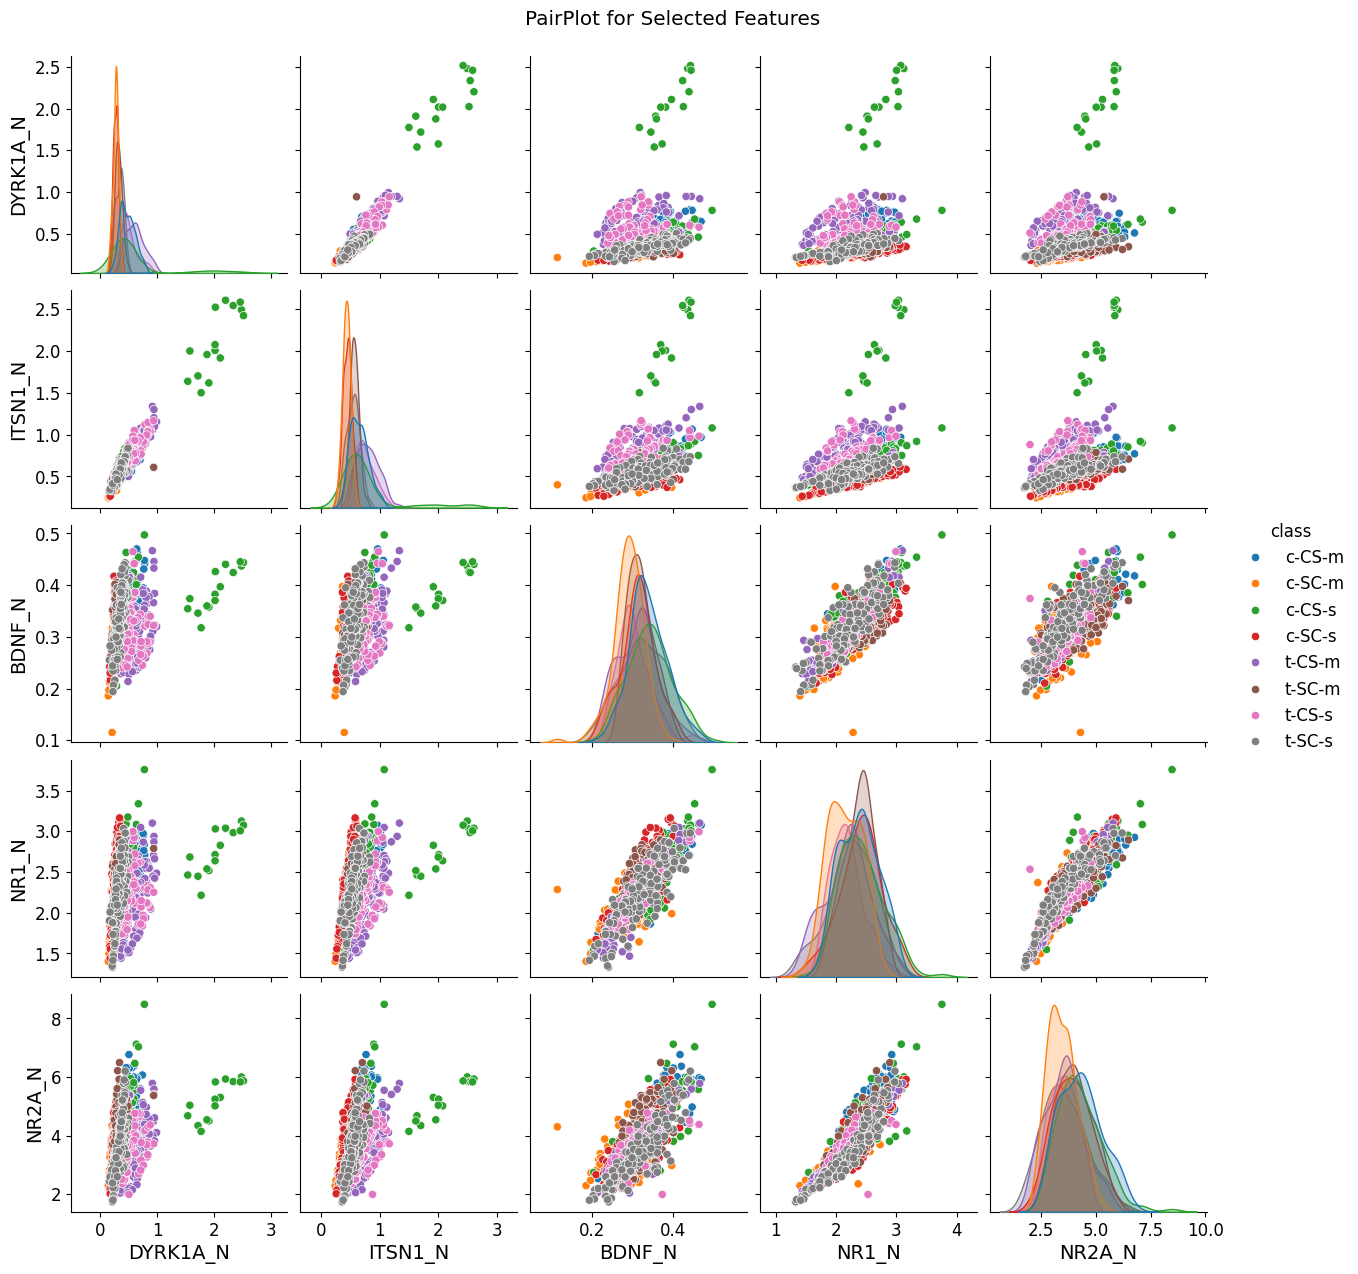

In [ ]:
selected_features = df[numeric_cols].iloc[:, :5]
selected_data = pd.concat([selected_features, df['class']], axis=1)

sns.pairplot(selected_data, hue='class', markers='o')
plt.suptitle('PairPlot for Selected Features', y=1.02)
plt.show()
#This is a PairPlot for several selected traits. The plot shows the distribution of values and the relationships between five variables: DYRK1A_N, ITSN1_N, BDNF_N, NR1_N and NR2A_N. Each diagonal cell shows the distribution of values for one trait and the remaining cells show the relationships between pairs of traits. The colour labels in the graphs represent the different classes indicated in the legend: c-CS-m, c-SC-m, c-CS-s, c-SC-s, t-CS-m, t-SC-m, t-CS-s and t-SC-s. Each class has a different colour to help visualise differences and similarities within and between classes.

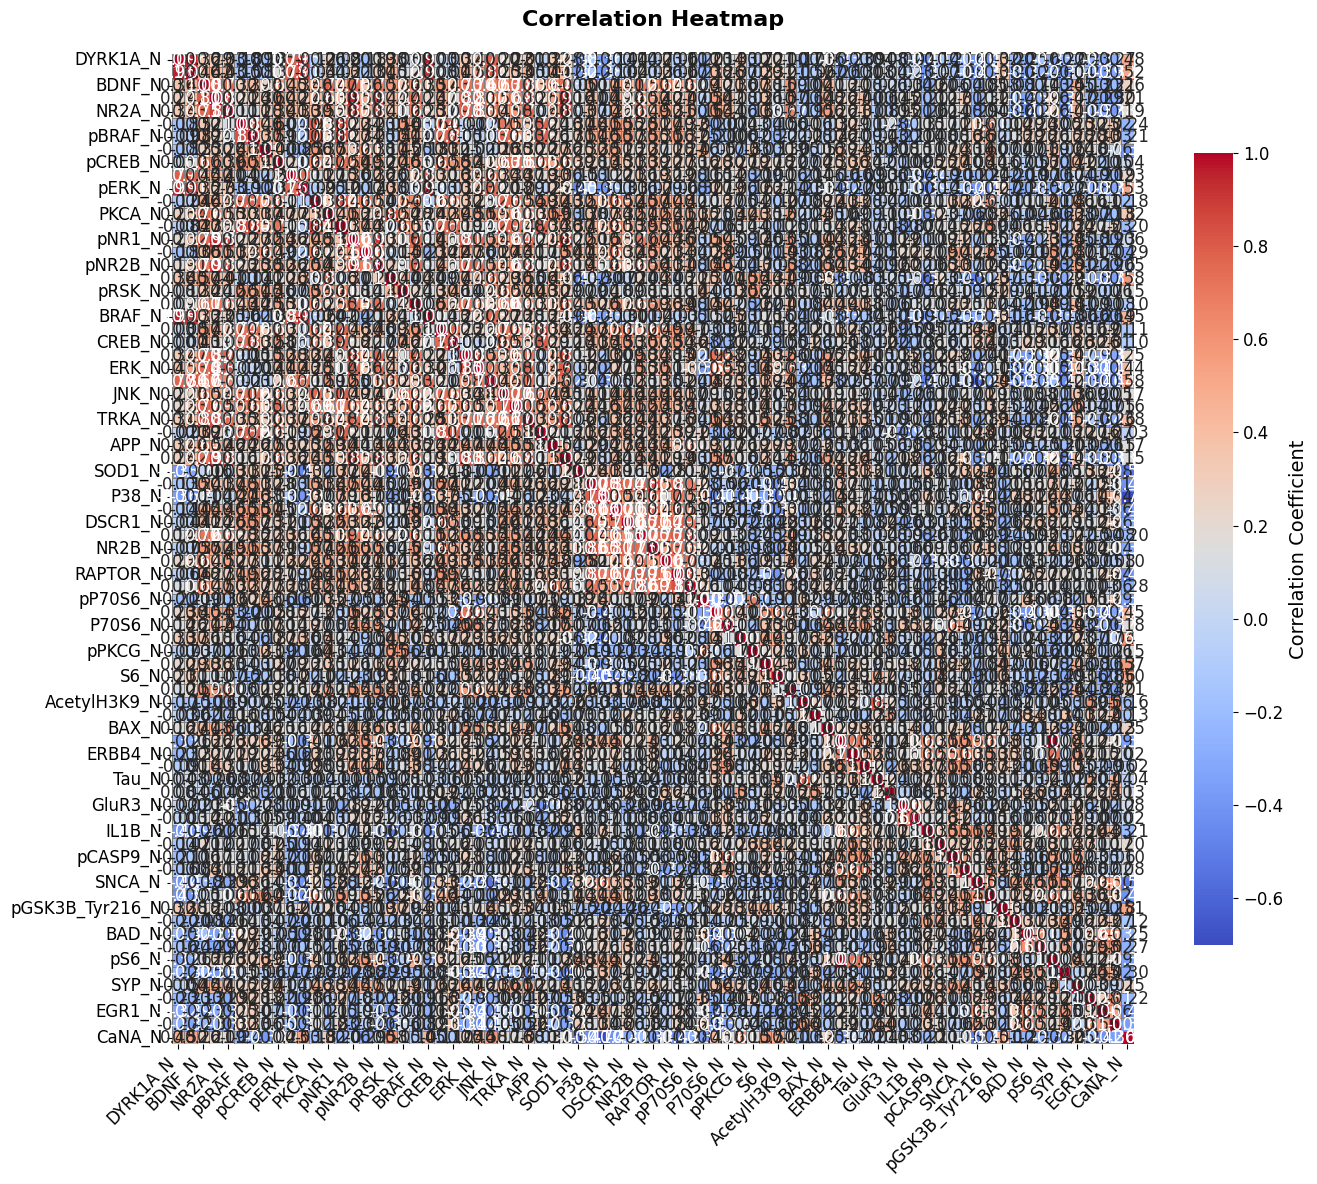

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(14, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.gca().collections[0].colorbar.ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()
#This graph shows a correlation matrix, which shows the relationships between different variables. The colour scale on the right indicates the strength of the correlation: red corresponds to positive correlation (up to +1) and blue corresponds to negative correlation (up to -1). Dark red areas indicate a high positive correlation between variables, and dark blue areas indicate a high negative correlation. Light colours or colours closer to the centre of the scale indicate weak or no correlation. The diagonal is filled with units as this is the correlation of the variables with themselves.

In [ ]:
   from sklearn.model_selection import GridSearchCV

   param_grid = {
       'n_estimators': [50, 100, 200],
       'max_features': ['auto', 'sqrt', 'log2'],
       'max_depth': [None, 10, 20, 30],
       'min_samples_split': [2, 5, 10]
   }

   grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
   grid_search.fit(X_train, y_train)

   print("Best combination of params:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Лучшая комбинация параметров: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_params = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_split': 2,
    'n_estimators': 100
}
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)
accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy with optimized parameters: {accuracy}")

Accuracy with optimized parameters: 1.0


In [ ]:
   from sklearn.model_selection import cross_val_score

   scores = cross_val_score(rf_model, X_train, y_train, cv=5)
   print("Cross-validation scores:", scores)
   print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0
